In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/is that santa.zip" -d "/content/"

Archive:  /content/is that santa.zip
   creating: /content/is that santa/
   creating: /content/is that santa/test/
   creating: /content/is that santa/test/not-a-santa/
  inflating: /content/is that santa/test/not-a-santa/0.not-a-santa.jpg  
  inflating: /content/is that santa/test/not-a-santa/1.not-a-santa.jpg  
  inflating: /content/is that santa/test/not-a-santa/100.not-a-santa.jpg  
  inflating: /content/is that santa/test/not-a-santa/103.not-a-santa.jpg  
  inflating: /content/is that santa/test/not-a-santa/104.not-a-santa.jpg  
  inflating: /content/is that santa/test/not-a-santa/105.not-a-santa.jpg  
  inflating: /content/is that santa/test/not-a-santa/107.not-a-santa.jpg  
  inflating: /content/is that santa/test/not-a-santa/109.not-a-santa.jpg  
  inflating: /content/is that santa/test/not-a-santa/110.not-a-santa.jpg  
  inflating: /content/is that santa/test/not-a-santa/111.not-a-santa.jpg  
  inflating: /content/is that santa/test/not-a-santa/113.not-a-santa.jpg  
  inflati

In [ ]:
#load the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
training_data=ImageDataGenerator(rescale=1./255) #normalize the image
testing_data=ImageDataGenerator(rescale=1./255)
train_data=training_data.flow_from_directory("/content/is that santa/train",target_size=(64,64),batch_size=32,class_mode='binary')
test_data=testing_data.flow_from_directory("/content/is that santa/test",target_size=(64,64),batch_size=32,class_mode='binary')

Found 614 images belonging to 2 classes.
Found 616 images belonging to 2 classes.


In [ ]:
#Class labels
train_data.class_indices

{'not-a-santa': 0, 'santa': 1}

In [ ]:
train_data.image_shape

(64, 64, 3)

In [ ]:
#Building the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
model=Sequential()
model.add(Conv2D(32,(3,3),strides=1,padding='valid',activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),strides=1,padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),strides=1,padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(512,(3,3),strides=1,padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 512)           │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,307,073 (12.62 MB)

 Trainable params: 3,307,073 (12.62 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_data,epochs=15,validation_data=test_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 916ms/step - accuracy: 0.4940 - loss: 0.8000 - val_accuracy: 0.5049 - val_loss: 0.6919
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 884ms/step - accuracy: 0.6365 - loss: 0.6828 - val_accuracy: 0.8328 - val_loss: 0.6243
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 873ms/step - accuracy: 0.8128 - loss: 0.5317 - val_accuracy: 0.8247 - val_loss: 0.4217
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 884ms/step - accuracy: 0.8874 - loss: 0.3137 - val_accuracy: 0.8799 - val_loss: 0.3203
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 874ms/step - accuracy: 0.8543 - loss: 0.3418 - val_accuracy: 0.8701 - val_loss: 0.3321
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.8970 - loss: 0.2999 - val_accuracy: 0.8620 - val_loss: 0.3711
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 849ms/step - accuracy: 0.9061 - loss: 0.2458 - val_accuracy: 0.8782 - val_loss: 0.3447
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 871ms/step - accuracy: 0.8378 - loss: 0.3536 - val_accurac

In [ ]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_data,epochs=20,validation_data=test_data)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 906ms/step - accuracy: 0.8880 - loss: 0.2535 - val_accuracy: 0.8815 - val_loss: 0.3214
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 873ms/step - accuracy: 0.8897 - loss: 0.2476 - val_accuracy: 0.8685 - val_loss: 0.3571
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 862ms/step - accuracy: 0.9397 - loss: 0.1410 - val_accuracy: 0.8831 - val_loss: 0.3175
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9461 - loss: 0.1367 - val_accuracy: 0.8734 - val_loss: 0.4030
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 880ms/step - accuracy: 0.9527 - loss: 0.1272 - val_accuracy: 0.8782 - val_loss: 0.3996
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 865ms/step - accuracy: 0.9456 - loss: 0.1333 - val_accuracy: 0.8782 - val_loss: 0.3896
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 884ms/step - accuracy: 0.9335 - loss: 0.1416 - val_accuracy: 0.8815 - val_loss: 0.3719
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 876ms/step - accuracy: 0.9576 - loss: 0.1076 - val_accurac

In [ ]:
loss,accuracy=model.evaluate(test_data)
print("Loss:",loss)
print("Accuracy:",accuracy)

20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 306ms/step - accuracy: 0.8972 - loss: 0.3766
Loss: 0.3913579285144806
Accuracy: 0.8912337422370911


In [ ]:
#Confusion matrix and Classification Report
from sklearn.metrics import confusion_matrix,classification_report
y_pred=model.predict(test_data)
pred_label=(y_pred>0.5).astype(int)
print(classification_report(test_data.classes,pred_label))

20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 271ms/step
              precision    recall  f1-score   support

           0       0.51      0.56      0.53       308
           1       0.51      0.47      0.49       308

    accuracy                           0.51       616
   macro avg       0.51      0.51      0.51       616
weighted avg       0.51      0.51      0.51       616



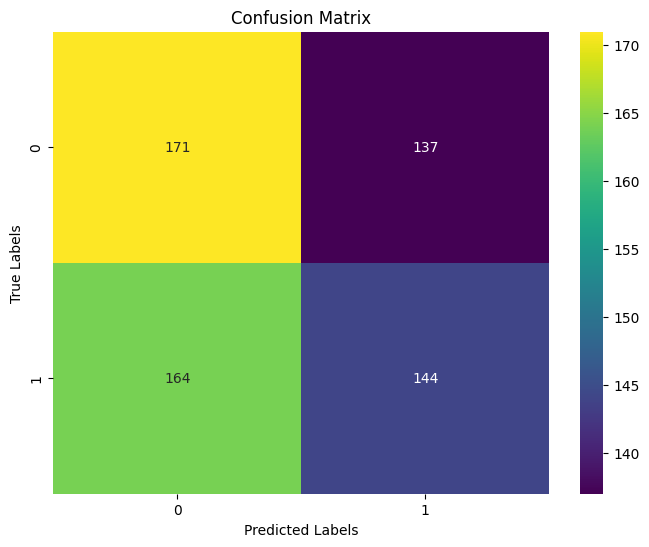

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
cm=confusion_matrix(test_data.classes,pred_label)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Model Architecture:
- A CNN with 4 convolutional layers, each followed by MaxPooling (pool size: 2×2) and ReLU activation.
- The layers have increasing filter sizes: 32, 64, 128, and 512.
- Dropout layers are added after pooling to prevent overfitting.
- The output is flattened and passed through  two fully connected (Dense) layers, with one output layer.

 Compilation & Training:
- The model is compiled using two different optimizers: Adam and SGD.
- The training process involves 15-20 epochs with a 20% validation split** or a separate validation dataset.


Training Performance:
15 Epochs: Training accuracy improved from 47.21% to 94.46%, with validation accuracy following the same trend.
20 Epochs: Training accuracy stabilized at 95.62%, but validation accuracy fluctuated around 93-95%, showing marginal improvement.
Comparison (15 vs. 20 Epochs):
Major accuracy gains occurred within the first 15 epochs.
Extending training to 20 epochs had little impact on validation accuracy, indicating diminishing returns.
Confusion Matrix & Metrics:
Accuracy: 51.%
Precision: 51.%, Recall: 47.5%, F1-score: 49.6%
High false positives & false negatives indicate poor class distinction.